In [4]:
import math
import numpy as np
import tensorflow as tf
from tqdm import tqdm

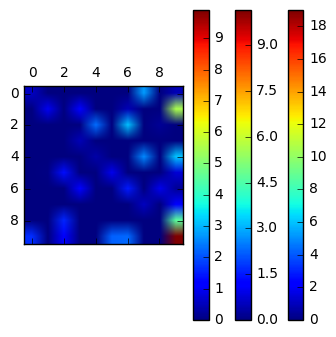

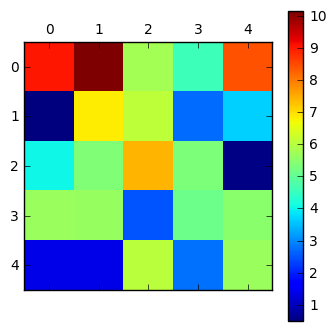

In [9]:
#Make some fake data, 1 data points
image = np.random.randint(10, size=[1,10,10]) + np.eye(10)*10
#tensorflow placeholders
#None - for batch processing
#(-1) keeps the same size
#10x10 is the shape
#1 is the number of "channels", like RGB colors or gray
X = tf.placeholder("float", [None, 10, 10])
y_ = tf.placeholder("float", [None,5])
X_im = tf.reshape(X, [-1, 10, 10, 1])

#Convolutional layer - window size of 3x3 
winx = 3
winy = 3

#How may features to compute on the window
num_filters = 2

#Weight, shape should match window size
#The '1' represents the number of the input channels (colors)

W1 = tf.Variable(tf.truncated_normal([winx, winy, 1, num_filters], stddev = 1./ math.sqrt(winx*winy)))
b1 = tf.Variable(tf.constant(0.1, shape=[num_filters]))

#3X3 convolution , pad with zeros on edges
#strides is how to step, here 1 pixel at a time
XW = tf.nn.conv2d(X_im, W1, strides=[1,1,1,1], padding='SAME')
h1 = tf.nn.relu(XW + b1)

#Remember to initialize
sess = tf.InteractiveSession()
sess.run(tf.initialize_all_variables())

#peek inside
H = h1.eval(feed_dict = {X: image})

#lets take a look 
import matplotlib.pyplot as plt
plt.ion()

#Original 
plt.matshow(image[0])
plt.colorbar()

#Conv channel 1
plt.imshow(H[0,:,:,0])
plt.colorbar()

#Conv channel 2
plt.imshow(H[0,:,:,1])
plt.colorbar()



#Pooling layer
#Maxpooling keeps the best of of 2 X 2 square in h1 output. ksize defines the size of this block. 'VALID' padding means
# incomplete squares aren't used. stride of 2X2 means no overlap of 2X2 blocks.

pl = tf.nn.max_pool(h1, ksize=[1,2,2,1], strides = [1,2,2,1], padding = 'VALID')
#We automatically determine the size
pl_size = np.product([s.value for s in pl.get_shape()[1:]])

#need to flatten convolutional output to be used in dense layer.
# -1 chooses appropriate shape to keep overall dimension to keep overall shape the same

plf = tf.reshape(pl, [-1, pl_size ])

#pooling layer before flattening - note that its only 5X5 now as we only kept the best of 2X2 window
P = pl.eval(feed_dict = {X : image})
plt.matshow(P[0,:,:,0])
plt.colorbar()

[[0 0 0 ..., 0 0 0]
 [0 0 0 ..., 0 0 0]
 [0 0 0 ..., 0 0 0]
 ..., 
 [0 0 0 ..., 0 0 0]
 [0 0 0 ..., 0 0 0]
 [0 0 0 ..., 0 0 0]]
0


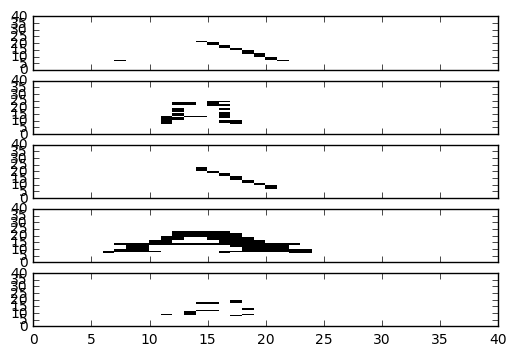

In [14]:
np.random.seed(0)

#Load data
data = np.load('data_with_labels.npz')
train = data['arr_0']/255
labels = data['arr_1']

#look at some data
print(train[0])
print(labels[0])

import matplotlib.pyplot as plt
plt.ion()

#Lets, look at a subplot of one of A in each font
plt.figure(figsize = (10,10))
f, plts = plt.subplots(5, sharex=True)
c = 91
for i in range(5):
    plts[i].pcolor(train[c + i *558], cmap = plt.cm.gray_r)

In [16]:
def to_onehot(labels, nclasses = 5):
    '''
    Convert labels to "one hot" format
    '''
    outputlabels = np.zeros((len(labels), nclasses))
    for i, l in enumerate(labels):
        outputlabels[i, l] = 1
    return outputlabels

onehot = to_onehot(labels)

In [17]:
# Split data into training and validation
indices = np.random.permutation(train.shape[0])
valid_cnt = int(train.shape[0] * 0.1)
test_idx, training_idx = indices[:valid_cnt], indices[valid_cnt:]
test, train = train[test_idx,:], train[training_idx,:]
onehot_test, onehot_train = onehot[test_idx,:], onehot[training_idx,:]

100%|##########| 10000/10000 [20:42:29<00:00,  1.59s/it]      000 [00:02<6:55:04,  2.49s/it]


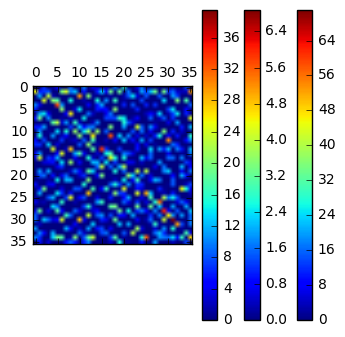

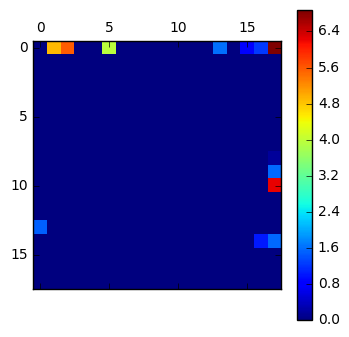

In [23]:
#Make some fake data, 1 data points
image = np.random.randint(36, size=[1,36,36]) + np.eye(36)*36
#tensorflow placeholders
#None - for batch processing
#(-1) keeps the same size
#10x10 is the shape
#1 is the number of "channels", like RGB colors or gray
X = tf.placeholder("float", [None, 36, 36])
y_ = tf.placeholder("float", [None,5])
X_im = tf.reshape(X, [-1, 36, 36, 1])

#Convolutional layer - window size of 3x3 
winx = 5
winy = 5

#How may features to compute on the window
num_filters = 4

#Weight, shape should match window size
#The '1' represents the number of the input channels (colors)

W1 = tf.Variable(tf.truncated_normal([winx, winy, 1, num_filters], stddev = 1./ math.sqrt(winx*winy)))
b1 = tf.Variable(tf.constant(0.1, shape=[num_filters]))

#3X3 convolution , pad with zeros on edges
#strides is how to step, here 1 pixel at a time
XW = tf.nn.conv2d(X_im, W1, strides=[1,1,1,1], padding='SAME')
h1 = tf.nn.relu(XW + b1)

#Remember to initialize
sess = tf.InteractiveSession()
sess.run(tf.initialize_all_variables())

#peek inside
H = h1.eval(feed_dict = {X: image})

#lets take a look 
import matplotlib.pyplot as plt
plt.ion()

#Original 
plt.matshow(image[0])
plt.colorbar()

#Conv channel 1
plt.imshow(H[0,:,:,0])
plt.colorbar()

#Conv channel 2
plt.imshow(H[0,:,:,1])
plt.colorbar()


pl = tf.nn.max_pool(h1, ksize=[1,2,2,1], strides = [1,2,2,1], padding = 'VALID')
#We automatically determine the size
pl_size = np.product([s.value for s in pl.get_shape()[1:]])

#need to flatten convolutional output to be used in dense layer.
# -1 chooses appropriate shape to keep overall dimension to keep overall shape the same

plf = tf.reshape(pl, [-1, pl_size ])

#pooling layer before flattening - note that its only 5X5 now as we only kept the best of 2X2 window
P = pl.eval(feed_dict = {X : image})
plt.matshow(P[0,:,:,0])
plt.colorbar()

#Add a dense layer

num_hidden = 32
W2 = tf.Variable(tf.truncated_normal([pl_size, num_hidden], stddev = 2./ math.sqrt(pl_size)))
b2 = tf.Variable(tf.constant(0.1, shape=[num_hidden]))
h2 = tf.nn.relu(tf.matmul(plf, W2) + b2)

W3 = tf.Variable(tf.truncated_normal([num_hidden, 5], stddev = 2./ math.sqrt(num_hidden)))
b3 = tf.Variable(tf.constant(0.1, shape=[5]))

keep_prob = tf.placeholder("float")
h2_drop = tf.nn.dropout(h2, keep_prob)

sess.run(tf.initialize_all_variables())

#define model
y = tf.nn.softmax(tf.matmul(h2_drop, W3) + b3)


# Climb on cross-entropy
cross_entropy = tf.reduce_mean(
        tf.nn.softmax_cross_entropy_with_logits(y + 1e-50, y_))

# How we train
train_step = tf.train.GradientDescentOptimizer(0.01).minimize(cross_entropy)

# Define accuracy
correct_prediction = tf.equal(tf.argmax(y,1), tf.argmax(y_,1))
accuracy = tf.reduce_mean(tf.cast(correct_prediction, "float"))

# Actually train
epochs = 10000
train_acc = np.zeros(epochs//10)
test_acc = np.zeros(epochs//10)
for i in tqdm(range(epochs), ascii=True):
    if i % 10 == 0:  # Record summary data, and the accuracy
        # Check accuracy on train set
        A = accuracy.eval(feed_dict={X: train, y_: onehot_train, keep_prob: 1.0})
        train_acc[i//10] = A

        # And now the validation set
        A = accuracy.eval(feed_dict={X: test, y_: onehot_test, keep_prob: 1.0})
        test_acc[i//10] = A
    train_step.run(feed_dict={X: train, y_: onehot_train, keep_prob: 0.5})

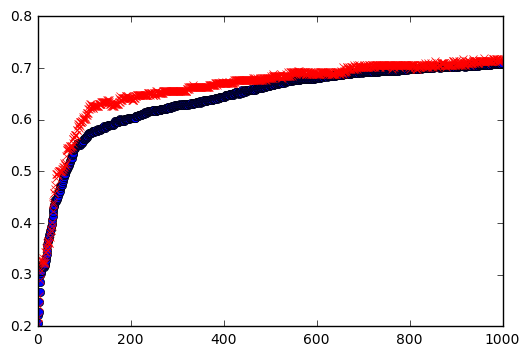

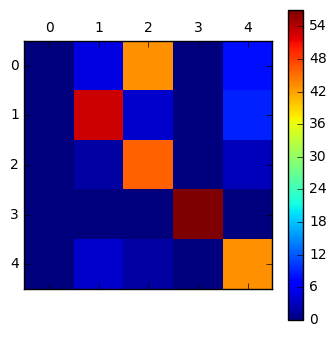

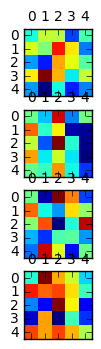

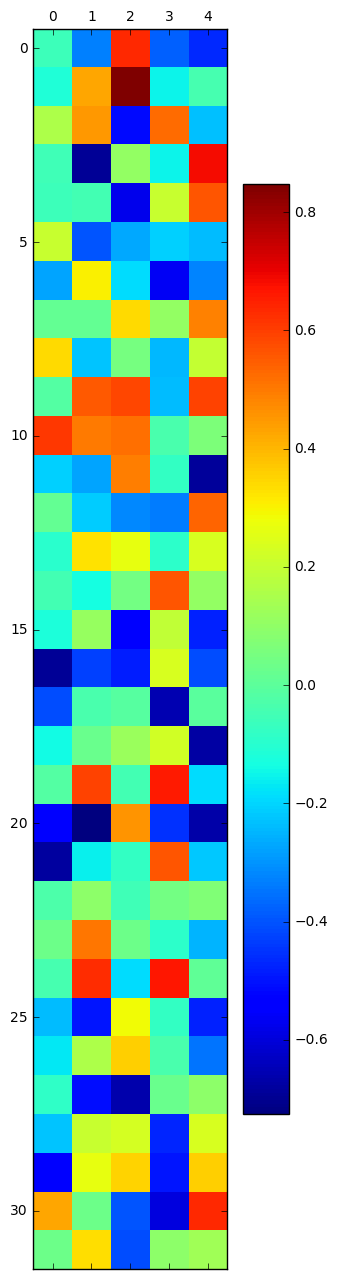

In [25]:
# Plot the accuracy curves
plt.plot(train_acc,'bo')
plt.plot(test_acc,'rx')

# Look at the final testing confusion matrix
pred = np.argmax(y.eval(feed_dict={X: test, y_: onehot_test, keep_prob: 1.0}), axis = 1)
conf = np.zeros([5,5])
for p,t in zip(pred,np.argmax(onehot_test,axis=1)):
    conf[t,p] += 1

plt.matshow(conf)
plt.colorbar()


# Let's look at a subplot of some weights
f, plts = plt.subplots(4)
for i in range(4):
    plts[i//2, i%2].matshow(W1.eval()[:,:,0,i])

    
#examine the utput weights
plt.matshow(W3.eval())
plt.colorbar()

#save the weights
saver = tf.train.Saver()
saver.save(sess, "convl.ckpt")
#restore
saver.restore(sess, 'convl.ckpt')

#or use numpy
def save_all(name = "convl"):
    np.savez_compressed(name, W1.eval(), b1.eval(), W2.eval(), b2.eval(),
                              W3.eval(), b3.eval())
    
save_all()

def load_all(name = "convl.npz"):
    data = np.load(name)
    sess.run(W1.assign(data['arr_0'])),
    sess.run(b1.assign(data['arr_1'])),
    sess.run(W2.assign(data['arr_2'])),
    sess.run(b2.assign(data['arr_3'])),
    sess.run(W3.assign(data['arr_4'])),
    sess.run(b3.assign(data['arr_5']))

load_all()

100%|##########| 10000/10000 [22:28:42<00:00,  2.50s/it]     0000 [00:03<10:52:47,  3.92s/it]


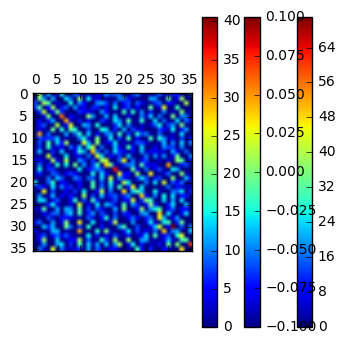

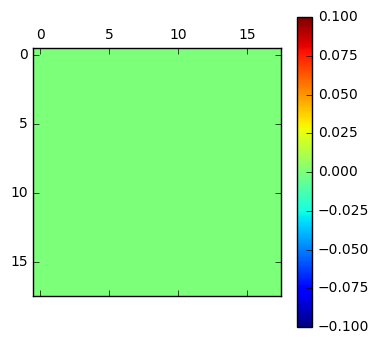

In [18]:
#Deepet convolution by addind two conv layer


#Make some fake data, 1 data points
image = np.random.randint(36, size=[1,36,36]) + np.eye(36)*36
#tensorflow placeholders
#None - for batch processing
#(-1) keeps the same size
#10x10 is the shape
#1 is the number of "channels", like RGB colors or gray
X = tf.placeholder("float", [None, 36, 36])
y_ = tf.placeholder("float", [None,5])
X_im = tf.reshape(X, [-1, 36, 36, 1])

#Convolutional layer - window size of 3x3 
winx = 3
winy = 3

#How may features to compute on the window
num_filters1 = 16

#Weight, shape should match window size
#The '1' represents the number of the input channels (colors)

W1 = tf.Variable(tf.truncated_normal([winx, winy, 1, num_filters1], stddev = 1./ math.sqrt(winx*winy)))
b1 = tf.Variable(tf.constant(0.1, shape=[num_filters1]))

#3X3 convolution , pad with zeros on edges
#strides is how to step, here 1 pixel at a time
XW = tf.nn.conv2d(X_im, W1, strides=[1,1,1,1], padding='SAME')
h1 = tf.nn.relu(XW + b1)

p1 = tf.nn.max_pool(h1, ksize=[1,2,2,1], strides = [1,2,2,1], padding = 'VALID')
#We automatically determine the size
p1_size = np.product([s.value for s in p1.get_shape()[1:]])
                                         
#Second conv layer
num_filters2 = 4
winx = 3
winy = 3
W2 = tf.Variable(tf.truncated_normal([winx, winy, num_filters1, num_filters2], stddev = 1./ math.sqrt(winx*winy)))
b2 = tf.Variable(tf.constant(0.1, shape=[num_filters2]))
plw2 = tf.nn.conv2d(p1, W2, strides=[1,1,1,1], padding='SAME')

h2 = tf.nn.relu(plw2+b2)
p2 = tf.nn.max_pool(h2, ksize=[1,2,2,1], strides = [1,2,2,1], padding = 'VALID')

#We automatically determine the size
p2_size = np.product([s.value for s in p2.get_shape()[1:]])

#need to flatten convolutional output to be used in dense layer.
# -1 chooses appropriate shape to keep overall dimension to keep overall shape the same

plf2 = tf.reshape(p2, [-1, p2_size])

#Add a dense layer

num_hidden = 32
W3 = tf.Variable(tf.truncated_normal([p2_size, num_hidden], stddev = 2./ math.sqrt(p2_size)))
b3 = tf.Variable(tf.constant(0.1, shape=[num_hidden]))
h3 = tf.nn.relu(tf.matmul(plf2, W3) + b3)
keep_prob = tf.placeholder("float")
h3_drop = tf.nn.dropout(h3, keep_prob)

                                         
W4 = tf.Variable(tf.truncated_normal([num_hidden, 5], stddev = 2./ math.sqrt(num_hidden)))
b4 = tf.Variable(tf.constant(0.1, shape=[5]))
sess.run(tf.initialize_all_variables())

#define model - output layer
y = tf.nn.softmax(tf.matmul(h3_drop, W4) + b4)


# Climb on cross-entropy
cross_entropy = tf.reduce_mean(
        tf.nn.softmax_cross_entropy_with_logits(y + 1e-50, y_))

# How we train
train_step = tf.train.GradientDescentOptimizer(0.01).minimize(cross_entropy)

# Define accuracy
correct_prediction = tf.equal(tf.argmax(y,1), tf.argmax(y_,1))
accuracy = tf.reduce_mean(tf.cast(correct_prediction, "float"))

# Actually train
epochs = 10000
train_acc = np.zeros(epochs//10)
test_acc = np.zeros(epochs//10)
for i in tqdm(range(epochs), ascii=True):
    if i % 10 == 0:  # Record summary data, and the accuracy
        # Check accuracy on train set
        A = accuracy.eval(feed_dict={X: train, y_: onehot_train, keep_prob: 1.0})
        train_acc[i//10] = A

        # And now the validation set
        A = accuracy.eval(feed_dict={X: test, y_: onehot_test, keep_prob: 1.0})
        test_acc[i//10] = A
    train_step.run(feed_dict={X: train, y_: onehot_train, keep_prob: 0.5})

ValueError: Dimension 0 in both shapes must be equal, but are 32 and 324

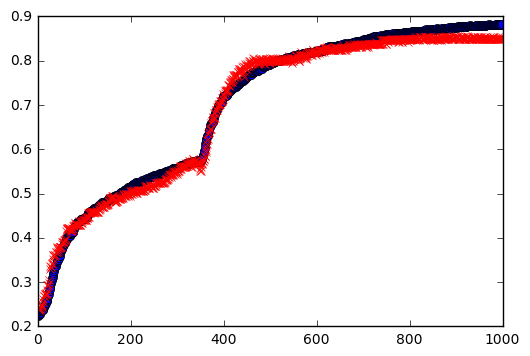

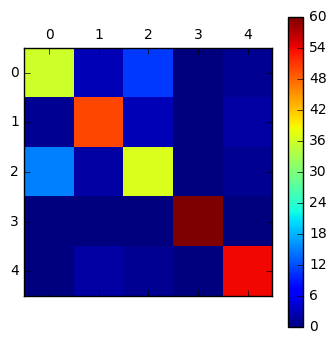

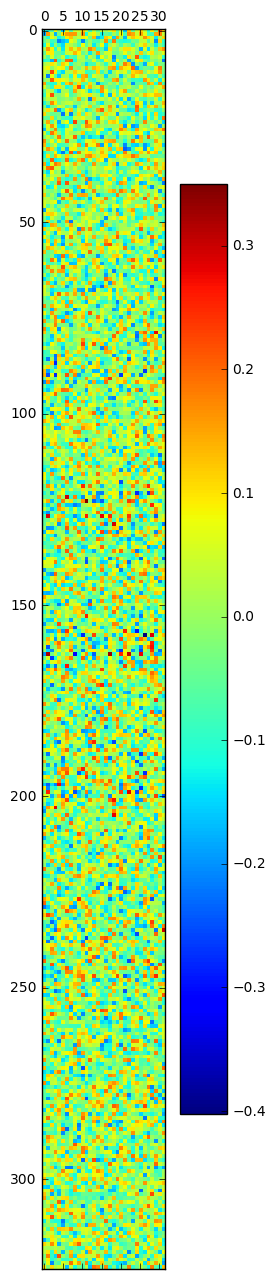

In [23]:
# Plot the accuracy curves
plt.plot(train_acc,'bo')
plt.plot(test_acc,'rx')

# Look at the final testing confusion matrix
pred = np.argmax(y.eval(feed_dict={X: test, y_: onehot_test, keep_prob: 1.0}), axis = 1)
conf = np.zeros([5,5])
for p,t in zip(pred,np.argmax(onehot_test,axis=1)):
    conf[t,p] += 1

plt.matshow(conf)
plt.colorbar()

    
#examine the utput weights
plt.matshow(W3.eval())
plt.colorbar()

#save the weights
saver = tf.train.Saver()
saver.save(sess, "conv2.ckpt")
#restore
saver.restore(sess, 'conv2.ckpt')

#or use numpy
def save_all(name = "conv2"):
    np.savez_compressed(name, W1.eval(), b1.eval(), W2.eval(), b2.eval(),
                              W3.eval(), b3.eval(), W3.eval(), b4.eval())
    
save_all()

def load_all(name = "conv2.npz"):
    data = np.load(name)
    sess.run(W1.assign(data['arr_0'])),
    sess.run(b1.assign(data['arr_1'])),
    sess.run(W2.assign(data['arr_2'])),
    sess.run(b2.assign(data['arr_3'])),
    sess.run(W3.assign(data['arr_4'])),
    sess.run(b3.assign(data['arr_5'])),
    sess.run(W4.assign(data['arr_6'])),
    see.run(b4.assign(data['arr_7']))

load_all()